# Statement

Link : https://www.kaggle.com/mohansacharya/graduate-admissions

This dataset is created for prediction of Graduate Admissions from an Indian perspective.

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 1. GRE Scores ( out of 340 ) 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 )

Acknowledgements
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format. The dataset is owned by Mohan S Acharya.

Inspiration
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

Citation
Please cite the following if you are interested in using the dataset : Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

# Meet and Greet Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Admission_Predict_Ver1.1.csv')
data.shape

(500, 9)

In [4]:
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.tail(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# Data Cleaning

In [8]:
#Step 1 Check Null data 

print('Check if dataset has null values')
print(data.isnull().sum())
print('There is no null value in the dataset')

Check if dataset has null values
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
There is no null value in the dataset


In [9]:
#Step 2 Drop useless attribute(s)

print(len(data['Serial No.'].unique()))
print('This shows that serial number cannot provide any information in the model, so we remove it from the dataset')
data=data.drop(['Serial No.'],axis=1)

500
This shows that serial number cannot provide any information in the model, so we remove it from the dataset


Check if there is outlier in the dataset. We know that GRE score should not be larger than 340, TOEFL score should not be larger than 120, CGPA should not be larger than 10.0 and etc


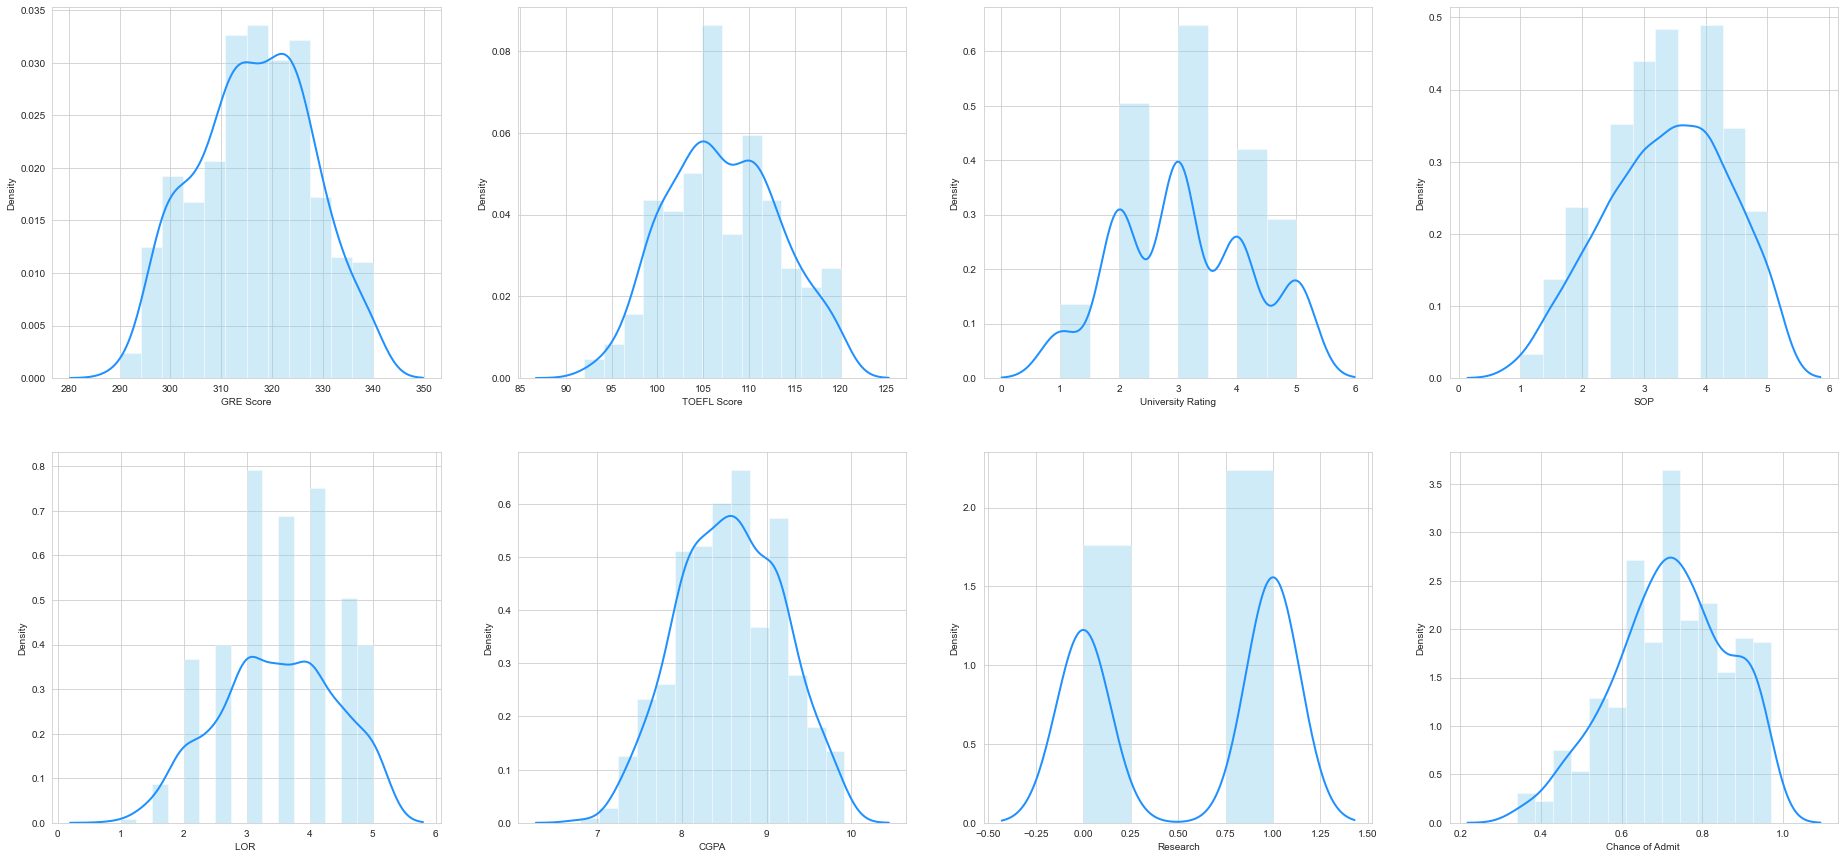

There is no outlier for all attibutes and the outcome


In [11]:
#Step 3 Check outlier

print('Check if there is outlier in the dataset. We know that GRE score should not be larger than 340, TOEFL score should not be larger than 120, CGPA should not be larger than 10.0 and etc')
plt.figure(figsize=(32,15))
i = 0
sns.set_style('whitegrid')
for item in data.columns:
    i += 1
    plt.subplot(2, 4, i)
    sns.distplot(data[item], kde_kws={"color":"dodgerblue","lw": 2},hist_kws={ "color": "skyblue"},)
#     sns.distplot(admission_v1[item], kde=True,label="{0}".format(item))
plt.show()
print('There is no outlier for all attibutes and the outcome')

In [15]:
#Step 4 Create new attibutes
from sklearn.preprocessing import LabelEncoder

print('We believe that admission committee members woudl like to consider a range(bin) of GRE, TOEFL and CGPA instead of certain values')
data['GREbin'] = pd.cut(data['GRE Score'], 10,right=False)  # GRE score will be  cut into (320,325],(325,330] 
data['TOEFLbin'] = pd.cut(data['TOEFL Score'],[92,100,105,110,115,121],right=False) #TOFEl score will be cut into (91,99],(100,105]
data['CGPAbin'] = pd.cut(data['CGPA'],[6.8,7,7.5,8,8.5,9,9.5,10],right=False) #CGPA will be cut into [6.8,7), [7,7.5)

label=LabelEncoder()
data['GREbin_code']=label.fit_transform(data['GREbin'])
data['TOEFLbin_code']=label.fit_transform(data['TOEFLbin'])
data['CGPAbin_code']=label.fit_transform(data['CGPAbin'])
data.sample(30)


We believe that admission committee members woudl like to consider a range(bin) of GRE, TOEFL and CGPA instead of certain values


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GREbin,TOEFLbin,CGPAbin,GREbin_code,TOEFLbin_code,CGPAbin_code
466,314,99,4,3.5,4.5,8.73,1,0.71,"[310.0, 315.0)","[92, 100)","[8.5, 9.0)",4,0,4
252,318,100,2,2.5,3.5,8.54,1,0.71,"[315.0, 320.0)","[100, 105)","[8.5, 9.0)",5,1,4
313,301,100,3,3.5,3.0,8.04,0,0.67,"[300.0, 305.0)","[100, 105)","[8.0, 8.5)",2,1,3
265,313,102,3,2.5,2.5,8.68,0,0.71,"[310.0, 315.0)","[100, 105)","[8.5, 9.0)",4,1,4
258,326,102,4,5.0,5.0,8.76,1,0.77,"[325.0, 330.0)","[100, 105)","[8.5, 9.0)",7,1,4
400,304,100,2,3.5,3.0,8.22,0,0.63,"[300.0, 305.0)","[100, 105)","[8.0, 8.5)",2,1,3
157,309,104,2,2.0,2.5,8.26,0,0.65,"[305.0, 310.0)","[100, 105)","[8.0, 8.5)",3,1,3
374,315,105,2,2.0,2.5,7.65,0,0.39,"[315.0, 320.0)","[105, 110)","[7.5, 8.0)",5,2,2
270,306,105,2,2.5,3.0,8.22,1,0.72,"[305.0, 310.0)","[105, 110)","[8.0, 8.5)",3,2,3
189,324,112,5,5.0,5.0,9.08,1,0.88,"[320.0, 325.0)","[110, 115)","[9.0, 9.5)",6,3,5


# Visualization

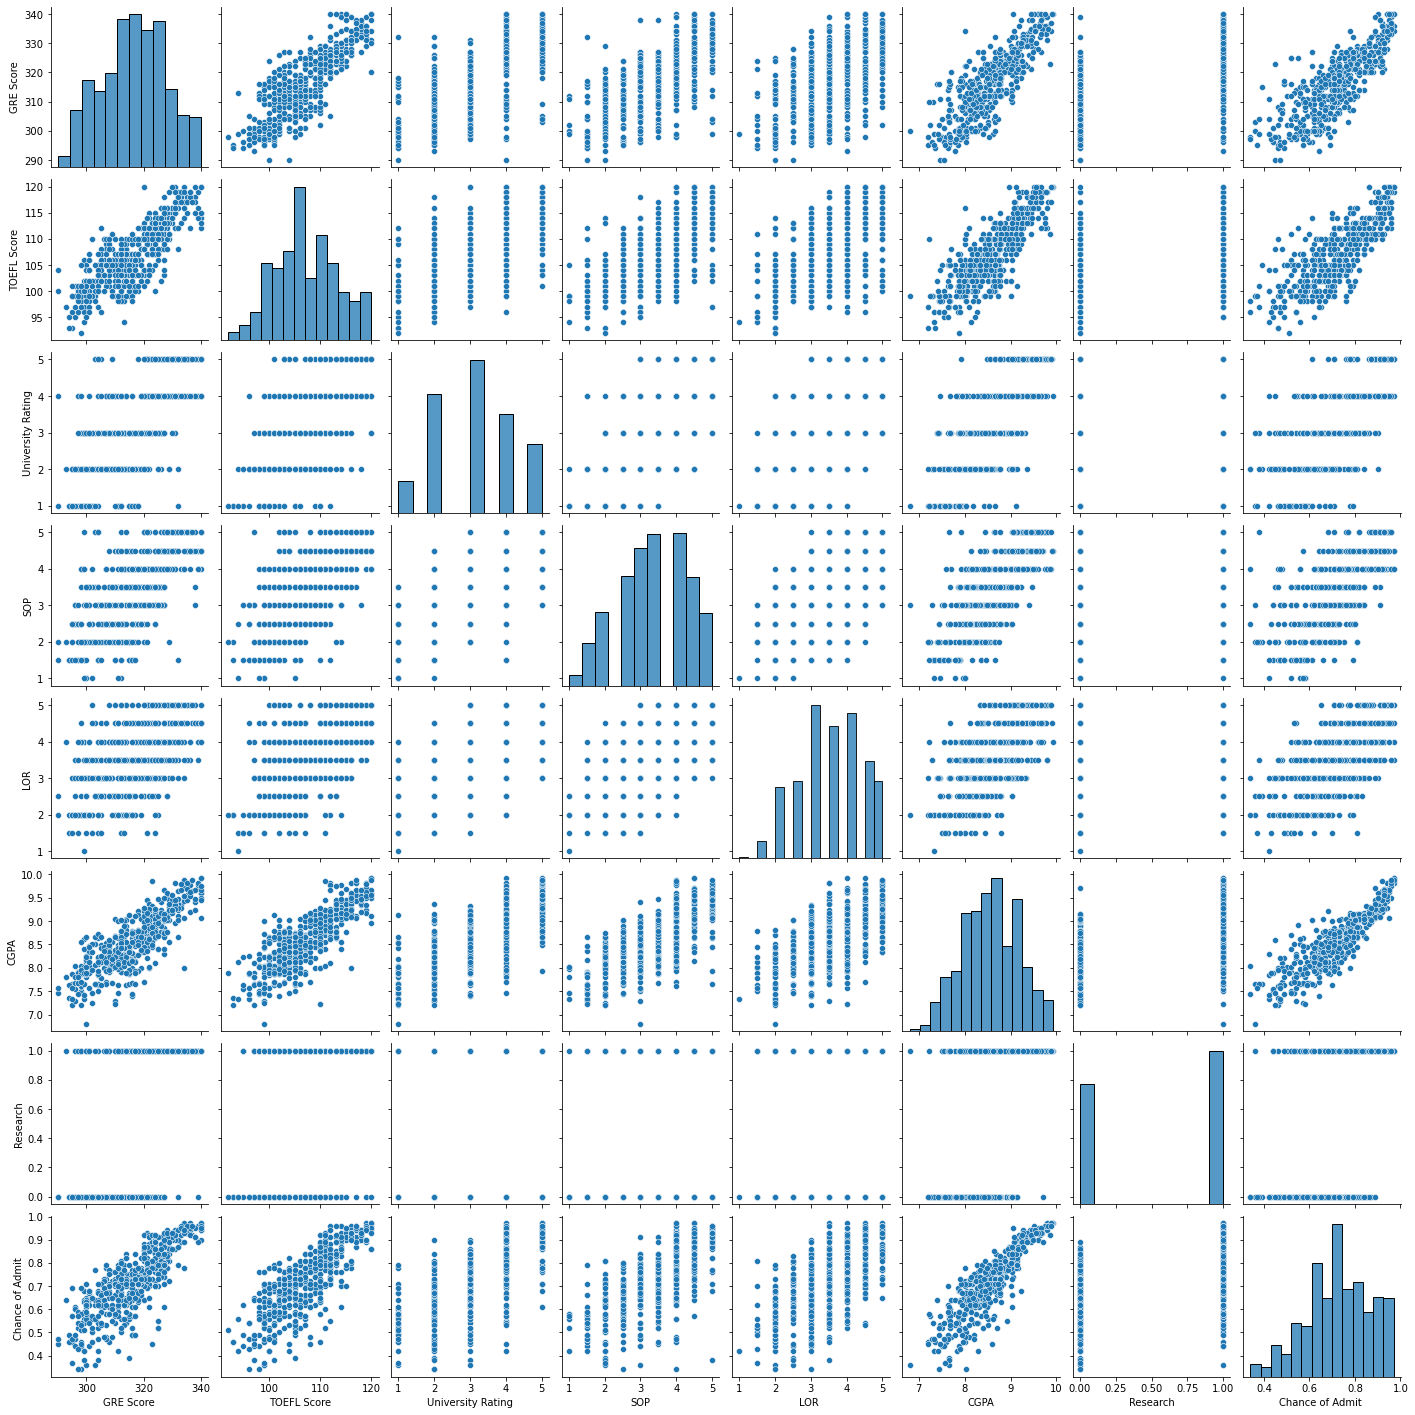

In [148]:
sns.pairplot(data)
plt.show()

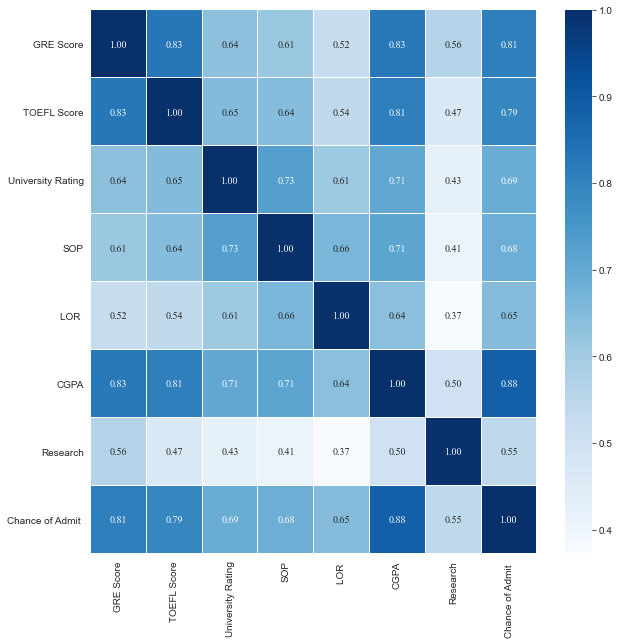

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="Blues",annot_kws={'font':'Times New Roman'})
plt.show()

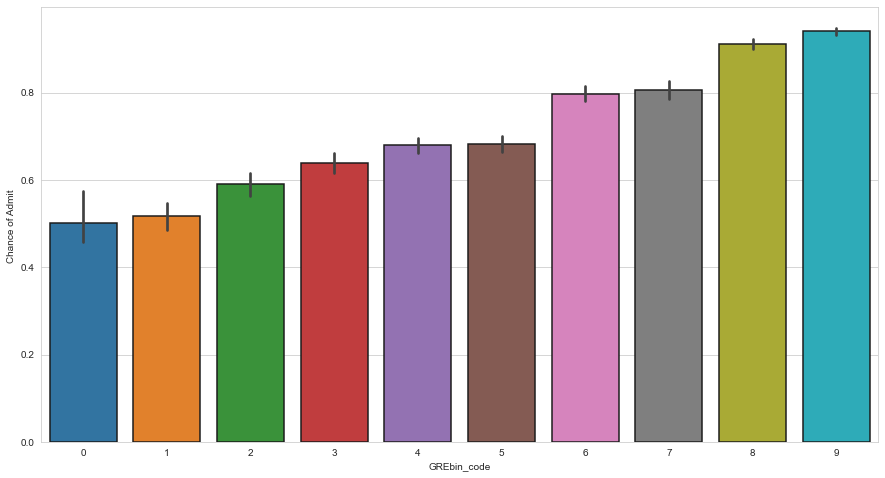

In [17]:
co_gre_bin=data[data["GREbin_code"]>=0]
co_toefel_bin=data[data["TOEFLbin_code"]>=1]
co_gpa_bin=data[data["CGPAbin_code"]>=5]
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='GREbin_code',y='Chance of Admit ',data=co_gre_bin, linewidth=1.5,edgecolor="0.1")
plt.show()

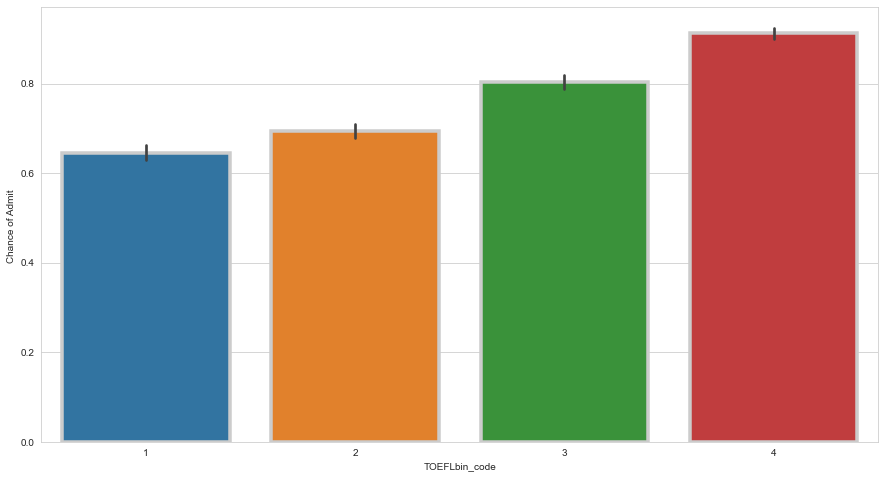

In [19]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='TOEFLbin_code',y='Chance of Admit ',data=co_toefel_bin, linewidth=3.5,edgecolor="0.8")
plt.show()

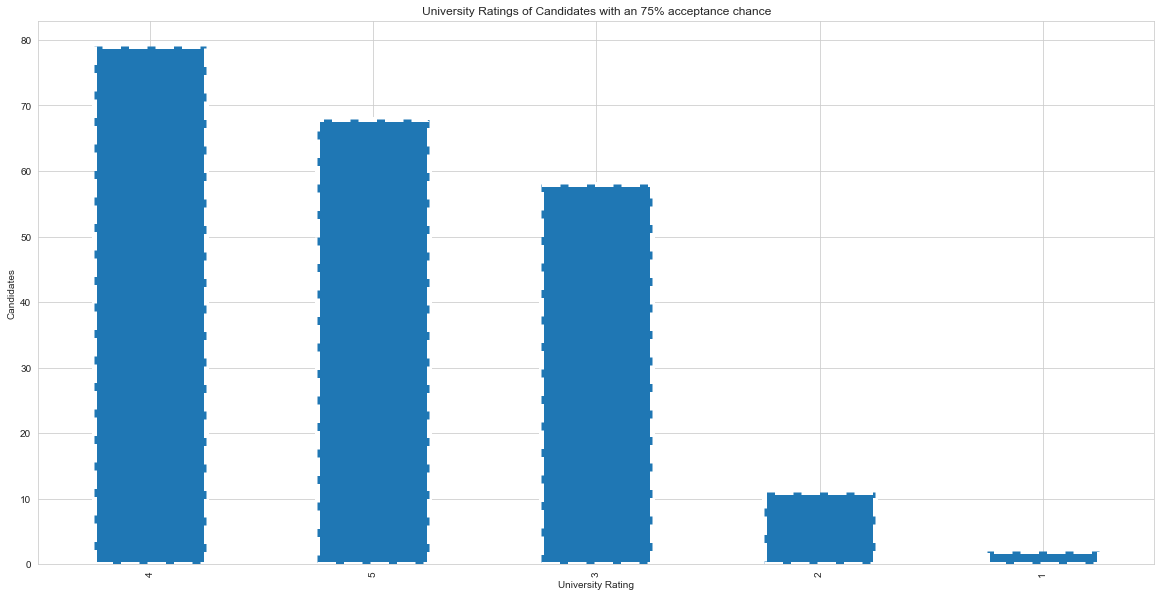

In [22]:
s = data[data['Chance of Admit '] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10),linestyle='dashed',linewidth=5)
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

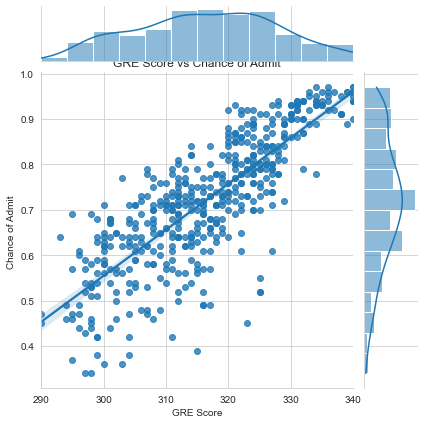

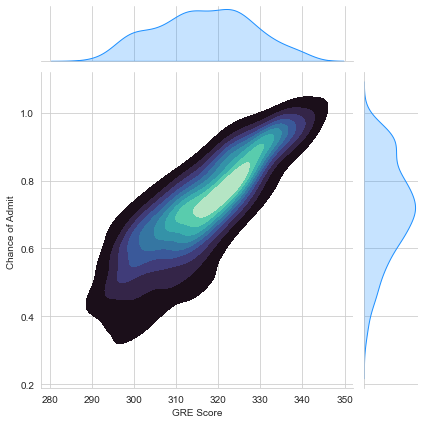

In [29]:
sns.jointplot(x = 'GRE Score',y ='Chance of Admit ',data = data,kind = 'reg')
plt.title('GRE Score vs Chance of Admit')
plt.show()

sns.jointplot(x = 'GRE Score',y ='Chance of Admit ',data = data,kind = 'kde',color = 'dodgerblue',fill = True,cmap="mako")
plt.show()

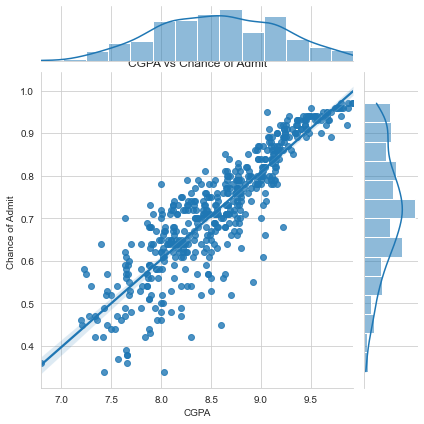

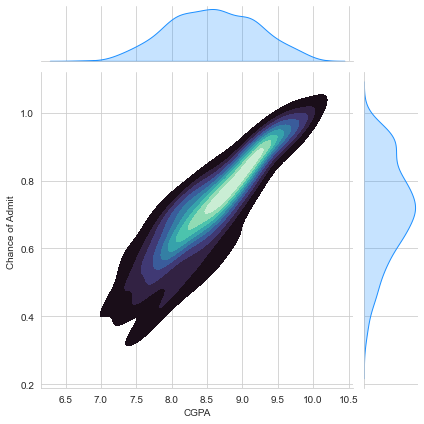

In [31]:
sns.jointplot(x = 'CGPA',y ='Chance of Admit ',data = data, kind = 'reg')
plt.title('CGPA vs Chance of Admit')
plt.show()

sns.jointplot(x = 'CGPA',y ='Chance of Admit ',data = data,kind = 'kde',color = 'dodgerblue',fill = True,cmap="mako")
plt.show()

# Model, Training, and Testing

In [11]:
#Feature selection
#Basically there are two methods to do feature selection:
#1. Use 'feature selection' mode in the scikit-learn.
#2.Choose appropriate features based on the result of correlation analysis and visualization.
#We choose the second method first

In [12]:
data=data.rename(columns={'LOR ':'LOR','Chance of Admit ':'Chance of Admit'})
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit', 'GREbin', 'TOEFLbin', 'CGPAbin',
       'GREbin_code', 'TOEFLbin_code', 'CGPAbin_code'],
      dtype='object')

In [13]:
features_list=[
    ('GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA','Research'),
    ('GREbin_code', 'TOEFLbin_code', 'University Rating', 'SOP', 'LOR', 'CGPAbin_code','Research'),
    ('GRE Score','CGPA','University Rating','LOR','Research','SOP'),
    ('GREbin_code','CGPAbin_code','University Rating','LOR','Research','SOP'),
    ('GRE Score','TOEFL Score','CGPA','University Rating','SOP','LOR'),
    ('GREbin_code','TOEFLbin_code','CGPAbin_code','University Rating','SOP','LOR'),
    ('GRE Score', 'University Rating', 'SOP', 'LOR', 'CGPA'),
    ('GREbin_code', 'University Rating', 'SOP', 'LOR', 'CGPAbin_code')]
    
#   ('SOP','LOR','Research')


In [14]:
X=data.drop('Chance of Admit',axis=1)
y=data['Chance of Admit']
Xstandard1=X[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA','Research','GREbin_code','TOEFLbin_code','CGPAbin_code']]
X[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA','Research','GREbin_code','TOEFLbin_code','CGPAbin_code']] = (Xstandard1 - np.min(Xstandard1))/(np.max(Xstandard1)-np.min(Xstandard1))
X.sample(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,GREbin,TOEFLbin,CGPAbin,GREbin_code,TOEFLbin_code,CGPAbin_code
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0,"[310.0, 315.0)","[100, 105)","[8.0, 8.5)",0.444444,0.25,0.500000
241,0.54,0.392857,0.25,0.375,0.250,0.432692,0.0,"[315.0, 320.0)","[100, 105)","[8.0, 8.5)",0.555556,0.25,0.500000
490,0.34,0.464286,0.25,0.375,0.875,0.423077,1.0,"[305.0, 310.0)","[105, 110)","[8.0, 8.5)",0.333333,0.50,0.500000
107,0.96,0.892857,0.75,0.625,0.875,0.852564,1.0,"[335.0, 340.05)","[115, 121)","[9.0, 9.5)",1.000000,1.00,0.833333
95,0.28,0.285714,0.75,0.125,0.375,0.333333,0.0,"[300.0, 305.0)","[100, 105)","[7.5, 8.0)",0.222222,0.25,0.333333
331,0.42,0.464286,0.25,0.500,0.250,0.423077,1.0,"[310.0, 315.0)","[105, 110)","[8.0, 8.5)",0.444444,0.50,0.500000
406,0.64,0.392857,0.75,0.500,0.375,0.391026,1.0,"[320.0, 325.0)","[100, 105)","[8.0, 8.5)",0.666667,0.25,0.500000
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,"[320.0, 325.0)","[110, 115)","[8.5, 9.0)",0.666667,0.75,0.666667
97,0.82,1.000000,0.50,0.750,0.750,0.692308,1.0,"[330.0, 335.0)","[115, 121)","[8.5, 9.0)",0.888889,1.00,0.666667
162,0.56,0.607143,0.50,0.500,0.500,0.544872,0.0,"[315.0, 320.0)","[105, 110)","[8.5, 9.0)",0.555556,0.50,0.666667


In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (400, 13)
X_test (100, 13)
y_train (400,)
y_test (100,)


In [16]:
from sklearn.linear_model import Ridge, LogisticRegression, Lasso
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import GridSearchCV,cross_val_score


In [20]:
def barplot(y_testvalue):
    sns.barplot(y=['All Features','All Features(bin)','No TOEFL','No TOFEL(bin)','No Research','No Research(bin)','No T&R','No T&R(bin) '],x=y_testvalue,palette=sns.hls_palette(8 , l = .8, s = .9))
    sns.despine(top=True, right=True, left=True, bottom=True) 
    sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# Linear Regression

('GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research')
Best parameters set:
{'alpha': 0.1}
RR train score is 0.059082069505958054
RR cross-validation score: 0.06020572521648407
RR test score is 0.06136967817330562
**************************************************
('GREbin_code', 'TOEFLbin_code', 'University Rating', 'SOP', 'LOR', 'CGPAbin_code', 'Research')
Best parameters set:
{'alpha': 0.1}
RR train score is 0.062093254781820616
RR cross-validation score: 0.06326492258322003
RR test score is 0.06297597217932892
**************************************************
('GRE Score', 'CGPA', 'University Rating', 'LOR', 'Research', 'SOP')
Best parameters set:
{'alpha': 0.1}
RR train score is 0.05982375472618822
RR cross-validation score: 0.06074310947055153
RR test score is 0.061467425705667066
**************************************************
('GREbin_code', 'CGPAbin_code', 'University Rating', 'LOR', 'Research', 'SOP')
Best parameters set:
{'alpha': 0.1}
RR tra

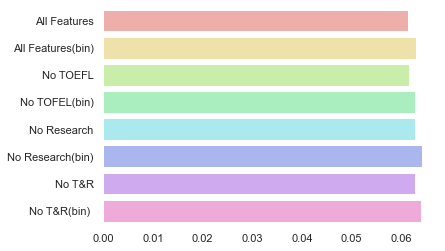

In [21]:
parameters=[{'alpha':np.logspace(-3,3,10)}]
y_testvalue=[]
for features in features_list:
    print(features)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
    
    ridgecv=GridSearchCV(Ridge(),parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
    ridgecv.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(ridgecv.best_params_)

    train_r2=np.sqrt(-ridgecv.score(X_train_set,y_train))
    val_r2 = np.sqrt(-ridgecv.best_score_)
    test_r2= np.sqrt(-ridgecv.score(X_test_set,y_test))
    
    print('RR train score is {}'.format(train_r2))
    print('RR cross-validation score: {}'.format(val_r2))
    print('RR test score is {}'.format(test_r2))
    y_testvalue.append(test_r2)
    print("*"*50)
    
barplot(y_testvalue)

('GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research')
Best parameters set:
{'alpha': 0.001}
RR train score is 0.05932420657669873
RR cross-validation score: 0.06033293002182677
RR test score is 0.06100692697038206
**************************************************
('GREbin_code', 'TOEFLbin_code', 'University Rating', 'SOP', 'LOR', 'CGPAbin_code', 'Research')
Best parameters set:
{'alpha': 0.001}
RR train score is 0.06230741270245607
RR cross-validation score: 0.06341561017286929
RR test score is 0.06282694849578102
**************************************************
('GRE Score', 'CGPA', 'University Rating', 'LOR', 'Research', 'SOP')
Best parameters set:
{'alpha': 0.001}
RR train score is 0.06005900922317104
RR cross-validation score: 0.060898063985056566
RR test score is 0.06119319183428026
**************************************************
('GREbin_code', 'CGPAbin_code', 'University Rating', 'LOR', 'Research', 'SOP')
Best parameters set:
{'alpha': 0.001}


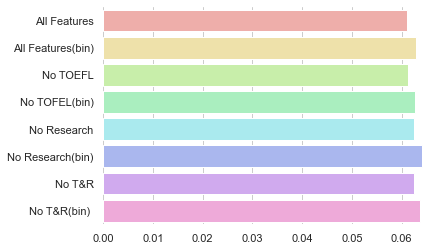

In [22]:
parameters=[{'alpha':np.logspace(-3,3,10)}]
y_testvalue=[]
for features in features_list:
    print(features)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
    
    lassocv=GridSearchCV(Lasso(),parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
    lassocv.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(lassocv.best_params_)

    train_r2=np.sqrt(-lassocv.score(X_train_set,y_train))
    val_r2 = np.sqrt(-lassocv.best_score_)
    test_r2= np.sqrt(-lassocv.score(X_test_set,y_test))
    
    print('RR train score is {}'.format(train_r2))
    print('RR cross-validation score: {}'.format(val_r2))
    print('RR test score is {}'.format(test_r2))
    y_testvalue.append(test_r2)
    print("*"*50)

barplot(y_testvalue)

In [57]:
features=[ 'CGPA', 'GRE Score', 'TOEFL Score','LOR', 'University Rating', 'Research','SOP']
a=Lasso(alpha=0.001).fit(X_train.loc[:,features],y_train)
a.coef_

array([0.34884989, 0.09342409, 0.07992154, 0.06217695, 0.03055844,
       0.02339441, 0.00158973])

# Decision Tree Regression

('GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research')
Best parameters set:
{'max_depth': 3, 'min_samples_split': 3}
RR train score is 0.06356191693214577
RR cross-validation score: 0.07551070952549437
RR test score is 0.07253189325184854
**************************************************
('GREbin_code', 'TOEFLbin_code', 'University Rating', 'SOP', 'LOR', 'CGPAbin_code', 'Research')
Best parameters set:
{'max_depth': 3, 'min_samples_split': 5}
RR train score is 0.06749506136263948
RR cross-validation score: 0.07278013178290434
RR test score is 0.0719647727626824
**************************************************
('GRE Score', 'CGPA', 'University Rating', 'LOR', 'Research', 'SOP')
Best parameters set:
{'max_depth': 4, 'min_samples_split': 3}
RR train score is 0.057252041573647966
RR cross-validation score: 0.07382005422238827
RR test score is 0.0705827828496907
**************************************************
('GREbin_code', 'CGPAbin_code', 'University Rat

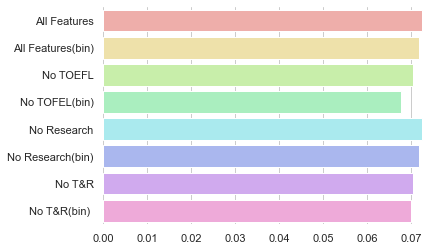

In [29]:
parameters = [
    {
        'max_depth': np.arange(3, 10),
        'min_samples_split': np.arange(2, 7),
    },
]

y_testvalue=[]
for features in features_list:
    print(features)

    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
    
    DTcv=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
    DTcv.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(DTcv.best_params_)

    train_r2=np.sqrt(-DTcv.score(X_train_set,y_train))
    val_r2 = np.sqrt(-DTcv.best_score_)
    test_r2= np.sqrt(-DTcv.score(X_test_set,y_test))
    
    print('RR train score is {}'.format(train_r2))
    print('RR cross-validation score: {}'.format(val_r2))
    print('RR test score is {}'.format(test_r2))
    y_testvalue.append(test_r2)
    print("*"*50)

barplot(y_testvalue)

# Random Forest Regression

('GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research')
Best parameters set:
{'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 17}
RR train score is 0.037658418062397836
RR cross-validation score: 0.06396743654143447
RR test score is 0.0679916380196569
**************************************************
('GREbin_code', 'TOEFLbin_code', 'University Rating', 'SOP', 'LOR', 'CGPAbin_code', 'Research')
Best parameters set:
{'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 19}
RR train score is 0.04203785865450066
RR cross-validation score: 0.0670882470774245
RR test score is 0.07092991099075821
**************************************************
('GRE Score', 'CGPA', 'University Rating', 'LOR', 'Research', 'SOP')
Best parameters set:
{'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 19}
RR train score is 0.04381030810290016
RR cross-validation score: 0.06363364377278269
RR test score is 0.06658217113873326
**************************************

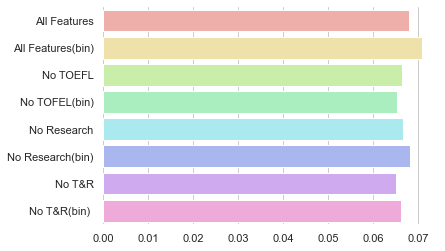

In [28]:
parameters = [
    {
        'max_depth': np.arange(3, 10),
        'min_samples_split': np.arange(2, 7),
        'n_estimators': np.arange(10, 20)
    },
]

y_testvalue=[]
for features in features_list:
    print(features)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
    
    RFcv=GridSearchCV(RandomForestRegressor(),parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
    RFcv.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(RFcv.best_params_)

    train_r2=np.sqrt(-RFcv.score(X_train_set,y_train))
    val_r2 = np.sqrt(-RFcv.best_score_)
    test_r2= np.sqrt(-RFcv.score(X_test_set,y_test))
    
    print('RR train score is {}'.format(train_r2))
    print('RR cross-validation score: {}'.format(val_r2))
    print('RR test score is {}'.format(test_r2))
    y_testvalue.append(test_r2)
    print("*"*50)

barplot(y_testvalue)

# Gradient Boosting Regression

('GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research')
Best parameters set:
{'learning_rate': 0.3, 'n_estimators': 11}
RR train score is 0.049782941986715325
RR cross-validation score: 0.06471300329556456
RR test score is 0.0640829843410148
('GREbin_code', 'TOEFLbin_code', 'University Rating', 'SOP', 'LOR', 'CGPAbin_code', 'Research')
Best parameters set:
{'learning_rate': 0.3, 'n_estimators': 14}
RR train score is 0.053188040302987925
RR cross-validation score: 0.06658499041387922
RR test score is 0.06507595986066811
('GRE Score', 'CGPA', 'University Rating', 'LOR', 'Research', 'SOP')
Best parameters set:
{'learning_rate': 0.3, 'n_estimators': 10}
RR train score is 0.051866023092160304
RR cross-validation score: 0.06470326351856973
RR test score is 0.06492746802918445
('GREbin_code', 'CGPAbin_code', 'University Rating', 'LOR', 'Research', 'SOP')
Best parameters set:
{'learning_rate': 0.3, 'n_estimators': 7}
RR train score is 0.06038833113123396
RR cross-va

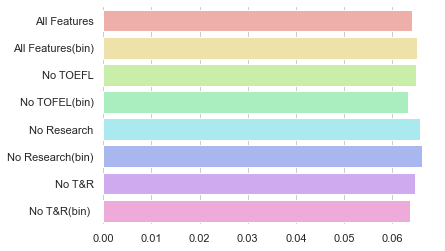

In [26]:
parameters = [
{
    'learning_rate': [0.01,0.03,0.1,0.3,1],
    'n_estimators': np.arange(3, 20)
    },
]

y_testvalue=[]
for features in features_list:
    print(features)

    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
   
    GBcv=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
    GBcv.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(GBcv.best_params_)

    train_r2=np.sqrt(-GBcv.score(X_train_set,y_train))
    val_r2 = np.sqrt(-GBcv.best_score_)
    test_r2= np.sqrt(-GBcv.score(X_test_set,y_test))
    
    print('RR train score is {}'.format(train_r2))
    print('RR cross-validation score: {}'.format(val_r2))
    print('RR test score is {}'.format(test_r2))
    y_testvalue.append(test_r2)

barplot(y_testvalue)

# SVM Rgression

('GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research')
Best parameters set:
{'C': 100, 'gamma': 0.01}
RR train score is 0.06660163104190704
RR cross-validation score: 0.0696680087696187
RR test score is 0.07073438966832414
**************************************************
('GREbin_code', 'TOEFLbin_code', 'University Rating', 'SOP', 'LOR', 'CGPAbin_code', 'Research')
Best parameters set:
{'C': 100, 'gamma': 0.01}
RR train score is 0.06632426640923743
RR cross-validation score: 0.06960015703239283
RR test score is 0.06823379455657742
**************************************************
('GRE Score', 'CGPA', 'University Rating', 'LOR', 'Research', 'SOP')
Best parameters set:
{'C': 100, 'gamma': 0.01}
RR train score is 0.06768062915829672
RR cross-validation score: 0.070087267861781
RR test score is 0.07103369458073121
**************************************************
('GREbin_code', 'CGPAbin_code', 'University Rating', 'LOR', 'Research', 'SOP')
Best parameters

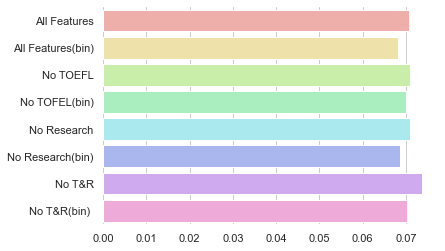

In [27]:
parameters = [
    {
        'gamma':[0.01,0.03,0.1,0.3,1,3,10],
        'C':[0.01,0.03,0.1,0.3,1,10,100]
    },
]

y_testvalue=[]
for features in features_list:
    print(features)

    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
   
    SVRcv=GridSearchCV(SVR(),parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
    SVRcv.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(SVRcv.best_params_)

    train_r2=np.sqrt(-SVRcv.score(X_train_set,y_train))
    val_r2 = np.sqrt(-SVRcv.best_score_)
    test_r2= np.sqrt(-SVRcv.score(X_test_set,y_test))
    
    print('RR train score is {}'.format(train_r2))
    print('RR cross-validation score: {}'.format(val_r2))
    print('RR test score is {}'.format(test_r2))
    y_testvalue.append(test_r2)
    print("*"*50)

barplot(y_testvalue)

## Classification

In [30]:
print("The admission rate of ULCA graudate school is about 14% in 2019, so it is argued that the applicant will be admitted if the chance of admission is larger than 0.85")
data['ChanceOfAdmit']=[1 if chance>=0.85  else 0 for chance in data['Chance of Admit']]
data['ChanceOfAdmit'].value_counts()

The admission rate of ULCA graudate school is about 14% in 2019, so it is argued that the applicant will be admitted if the chance of admission is larger than 0.85


0    391
1    109
Name: ChanceOfAdmit, dtype: int64

In [31]:
y_classification = data['ChanceOfAdmit']

In [32]:
X_train_cla,X_test_cla,y_train_cla,y_test_cla = train_test_split(X,y_classification,test_size=0.20,random_state=101)
print('X_train',X_train_cla.shape)
print('X_test',X_test_cla.shape)
print('y_train',y_train_cla.shape)
print('y_test',y_test_cla.shape)

X_train (400, 13)
X_test (100, 13)
y_train (400,)
y_test (100,)


In [33]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Decision Tree classification

Best parameters set:
{'max_depth': 4, 'min_samples_split': 2}


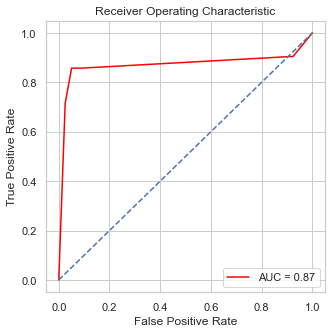

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       312
           1       0.96      0.98      0.97        88

    accuracy                           0.98       400
   macro avg       0.97      0.98      0.98       400
weighted avg       0.99      0.98      0.99       400

Train Confusion Matrix:
[[308   4]
 [  2  86]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        79
           1       0.78      0.86      0.82        21

    accuracy                           0.92       100
   macro avg       0.87      0.90      0.88       100
weighted avg       0.92      0.92      0.92       100

Test1 Confusion Matrix:
[[74  5]
 [ 3 18]]
**************************************************
Best parameters set:
{'max_depth': 8, 'min_samples_split': 3}


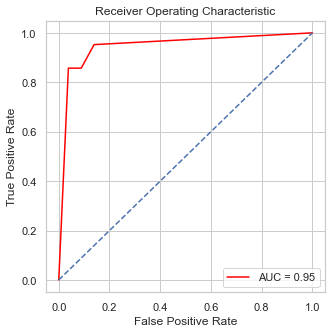

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       312
           1       1.00      0.91      0.95        88

    accuracy                           0.98       400
   macro avg       0.99      0.95      0.97       400
weighted avg       0.98      0.98      0.98       400

Train Confusion Matrix:
[[312   0]
 [  8  80]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        79
           1       0.86      0.86      0.86        21

    accuracy                           0.94       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.94      0.94      0.94       100

Test1 Confusion Matrix:
[[76  3]
 [ 3 18]]
**************************************************
Best parameters set:
{'max_depth': 5, 'min_samples_split': 2}


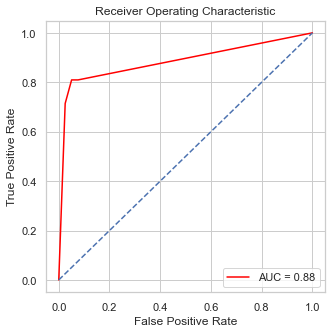

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       312
           1       0.99      0.97      0.98        88

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.99       400
weighted avg       0.99      0.99      0.99       400

Train Confusion Matrix:
[[311   1]
 [  3  85]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        79
           1       0.81      0.81      0.81        21

    accuracy                           0.92       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.92      0.92      0.92       100

Test1 Confusion Matrix:
[[75  4]
 [ 4 17]]
**************************************************
Best parameters set:
{'max_depth': 8, 'min_samples_split': 5}


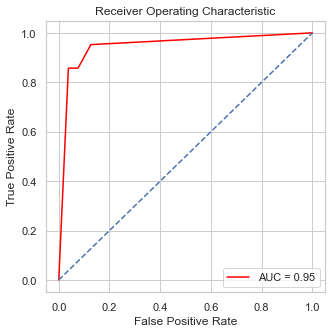

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       312
           1       1.00      0.88      0.93        88

    accuracy                           0.97       400
   macro avg       0.98      0.94      0.96       400
weighted avg       0.97      0.97      0.97       400

Train Confusion Matrix:
[[312   0]
 [ 11  77]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        79
           1       0.86      0.86      0.86        21

    accuracy                           0.94       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.94      0.94      0.94       100

Test1 Confusion Matrix:
[[76  3]
 [ 3 18]]
**************************************************
Best parameters set:
{'max_depth': 9, 'min_samples_split': 2}


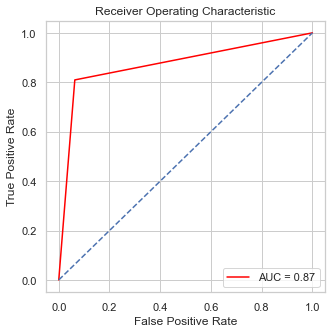

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00        88

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Train Confusion Matrix:
[[312   0]
 [  0  88]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        79
           1       0.77      0.81      0.79        21

    accuracy                           0.91       100
   macro avg       0.86      0.87      0.87       100
weighted avg       0.91      0.91      0.91       100

Test1 Confusion Matrix:
[[74  5]
 [ 4 17]]
**************************************************
Best parameters set:
{'max_depth': 8, 'min_samples_split': 3}


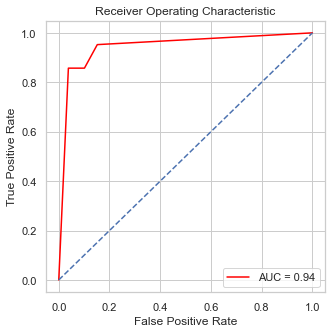

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       312
           1       1.00      0.90      0.95        88

    accuracy                           0.98       400
   macro avg       0.99      0.95      0.97       400
weighted avg       0.98      0.98      0.98       400

Train Confusion Matrix:
[[312   0]
 [  9  79]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        79
           1       0.86      0.86      0.86        21

    accuracy                           0.94       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.94      0.94      0.94       100

Test1 Confusion Matrix:
[[76  3]
 [ 3 18]]
**************************************************
Best parameters set:
{'max_depth': 7, 'min_samples_split': 2}


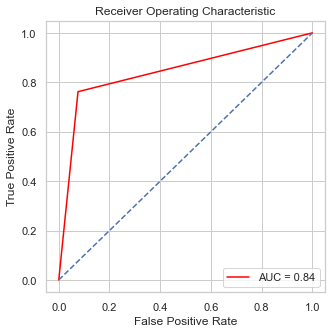

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00        88

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Train Confusion Matrix:
[[312   0]
 [  0  88]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        79
           1       0.73      0.76      0.74        21

    accuracy                           0.89       100
   macro avg       0.83      0.84      0.84       100
weighted avg       0.89      0.89      0.89       100

Test1 Confusion Matrix:
[[73  6]
 [ 5 16]]
**************************************************
Best parameters set:
{'max_depth': 7, 'min_samples_split': 5}


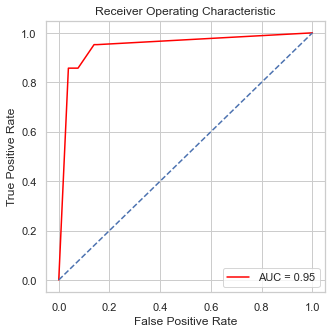

Train Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       312
           1       1.00      0.86      0.93        88

    accuracy                           0.97       400
   macro avg       0.98      0.93      0.95       400
weighted avg       0.97      0.97      0.97       400

Train Confusion Matrix:
[[312   0]
 [ 12  76]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        79
           1       0.86      0.86      0.86        21

    accuracy                           0.94       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.94      0.94      0.94       100

Test1 Confusion Matrix:
[[76  3]
 [ 3 18]]
**************************************************


In [35]:
parameters = [
    {
        'max_depth': np.arange(3, 10),
        'min_samples_split': np.arange(2, 7),
    },
]

for features in features_list:
    X_train_set=X_train_cla.loc[:,features]
    X_test_set=X_test_cla.loc[:,features]
    
    dtcv = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,scoring='accuracy')
    dtcv.fit(X_train_set, y_train_cla)
    print('Best parameters set:')
    print(dtcv.best_params_)

    y_pred=dtcv.predict(X_test_set)
    y_proba=dtcv.predict_proba(X_test_set)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_cla,y_proba[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plot_roc_(false_positive_rate,true_positive_rate,roc_auc)
    
    predictions = [
    (dtcv.predict(X_train_set), y_train_cla, 'Train'),
    (dtcv.predict(X_test_set), y_test_cla, 'Test1')
    ]
    
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print(classification_report(pred[1], pred[0]))
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)


# KNN classification

Best parameters set:
{'n_neighbors': 25}


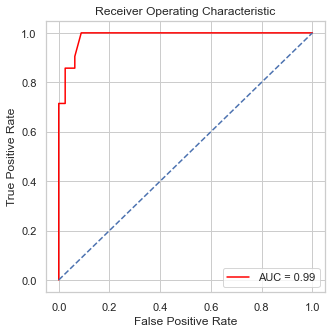

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       312
           1       0.96      0.90      0.93        88

    accuracy                           0.97       400
   macro avg       0.97      0.94      0.96       400
weighted avg       0.97      0.97      0.97       400

Train Confusion Matrix:
[[309   3]
 [  9  79]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        79
           1       0.79      0.90      0.84        21

    accuracy                           0.93       100
   macro avg       0.88      0.92      0.90       100
weighted avg       0.94      0.93      0.93       100

Test1 Confusion Matrix:
[[74  5]
 [ 2 19]]
**************************************************
Best parameters set:
{'n_neighbors': 14}


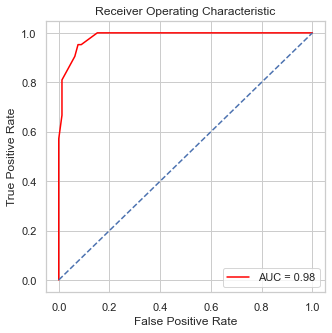

Train Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       312
           1       0.93      0.85      0.89        88

    accuracy                           0.95       400
   macro avg       0.94      0.92      0.93       400
weighted avg       0.95      0.95      0.95       400

Train Confusion Matrix:
[[306   6]
 [ 13  75]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        79
           1       0.79      0.90      0.84        21

    accuracy                           0.93       100
   macro avg       0.88      0.92      0.90       100
weighted avg       0.94      0.93      0.93       100

Test1 Confusion Matrix:
[[74  5]
 [ 2 19]]
**************************************************
Best parameters set:
{'n_neighbors': 22}


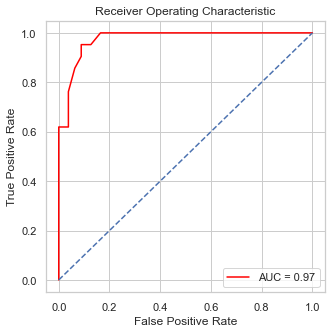

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       312
           1       0.94      0.88      0.91        88

    accuracy                           0.96       400
   macro avg       0.95      0.93      0.94       400
weighted avg       0.96      0.96      0.96       400

Train Confusion Matrix:
[[307   5]
 [ 11  77]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        79
           1       0.73      0.90      0.81        21

    accuracy                           0.91       100
   macro avg       0.85      0.91      0.87       100
weighted avg       0.92      0.91      0.91       100

Test1 Confusion Matrix:
[[72  7]
 [ 2 19]]
**************************************************
Best parameters set:
{'n_neighbors': 19}


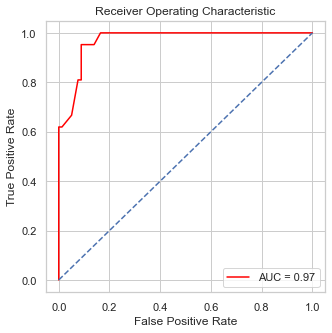

Train Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       312
           1       0.89      0.88      0.88        88

    accuracy                           0.95       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.95      0.95      0.95       400

Train Confusion Matrix:
[[302  10]
 [ 11  77]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        79
           1       0.73      0.90      0.81        21

    accuracy                           0.91       100
   macro avg       0.85      0.91      0.87       100
weighted avg       0.92      0.91      0.91       100

Test1 Confusion Matrix:
[[72  7]
 [ 2 19]]
**************************************************
Best parameters set:
{'n_neighbors': 19}


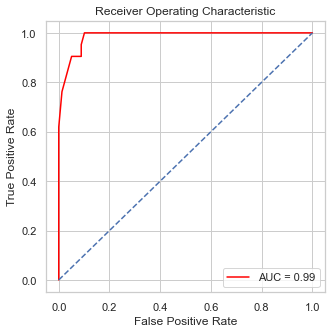

Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       312
           1       0.92      0.94      0.93        88

    accuracy                           0.97       400
   macro avg       0.95      0.96      0.96       400
weighted avg       0.97      0.97      0.97       400

Train Confusion Matrix:
[[305   7]
 [  5  83]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        79
           1       0.83      0.90      0.86        21

    accuracy                           0.94       100
   macro avg       0.90      0.93      0.91       100
weighted avg       0.94      0.94      0.94       100

Test1 Confusion Matrix:
[[75  4]
 [ 2 19]]
**************************************************
Best parameters set:
{'n_neighbors': 16}


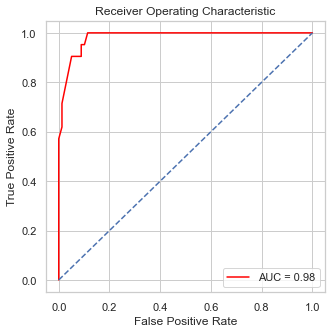

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       312
           1       0.91      0.89      0.90        88

    accuracy                           0.95       400
   macro avg       0.94      0.93      0.93       400
weighted avg       0.95      0.95      0.95       400

Train Confusion Matrix:
[[304   8]
 [ 10  78]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        79
           1       0.83      0.90      0.86        21

    accuracy                           0.94       100
   macro avg       0.90      0.93      0.91       100
weighted avg       0.94      0.94      0.94       100

Test1 Confusion Matrix:
[[75  4]
 [ 2 19]]
**************************************************
Best parameters set:
{'n_neighbors': 26}


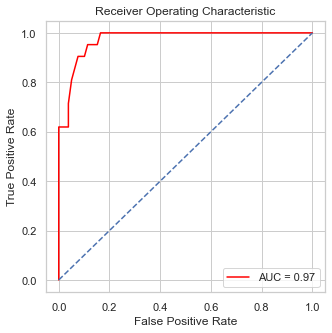

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       312
           1       0.91      0.91      0.91        88

    accuracy                           0.96       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.96      0.96      0.96       400

Train Confusion Matrix:
[[304   8]
 [  8  80]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        79
           1       0.76      0.90      0.83        21

    accuracy                           0.92       100
   macro avg       0.87      0.91      0.89       100
weighted avg       0.93      0.92      0.92       100

Test1 Confusion Matrix:
[[73  6]
 [ 2 19]]
**************************************************
Best parameters set:
{'n_neighbors': 30}


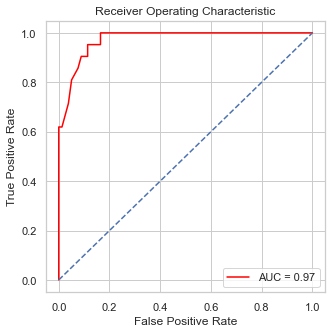

Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       312
           1       0.86      0.92      0.89        88

    accuracy                           0.95       400
   macro avg       0.92      0.94      0.93       400
weighted avg       0.95      0.95      0.95       400

Train Confusion Matrix:
[[299  13]
 [  7  81]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        79
           1       0.73      0.90      0.81        21

    accuracy                           0.91       100
   macro avg       0.85      0.91      0.87       100
weighted avg       0.92      0.91      0.91       100

Test1 Confusion Matrix:
[[72  7]
 [ 2 19]]
**************************************************


In [36]:
parameters=[
{
    'n_neighbors':np.arange(2,33),
    },
]

for features in features_list:
    X_train_set=X_train_cla.loc[:,features]
    X_test_set=X_test_cla.loc[:,features]
    
    knncv = GridSearchCV(KNeighborsClassifier(), parameters, cv=5,scoring='accuracy')
    knncv.fit(X_train_set, y_train_cla)
    print('Best parameters set:')
    print(knncv.best_params_)
    
    y_pred=knncv.predict(X_test_set)
    y_proba=knncv.predict_proba(X_test_set)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_cla,y_proba[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plot_roc_(false_positive_rate,true_positive_rate,roc_auc)
    
    predictions = [
    (knncv.predict(X_train_set), y_train_cla, 'Train'),
    (knncv.predict(X_test_set), y_test_cla, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print(classification_report(pred[1], pred[0]))
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)


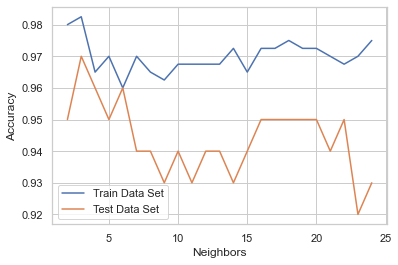

In [37]:
n_neighbors = range(2, 25)
train_data_accuracy = []
test_data_accuracy = []
X_train_set=X_train_cla.loc[:,['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA','Research']]
X_test_set=X_test_cla.loc[:,['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA','Research']]
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh)
    knn.fit(X_train_set, y_train_cla)
    train_data_accuracy.append(knn.score(X_train_set, y_train_cla))
    test_data_accuracy.append(knn.score(X_test_set, y_test_cla))
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test_data_accuracy, label="Test Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

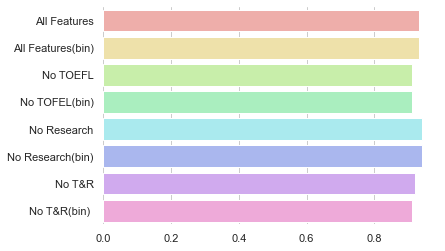

In [43]:
knn_y=[0.93,0.93,0.91,0.91,0.94,0.94,0.92,0.91]
barplot(knn_y)

# Random Forest Classification

Best parameters set:
{'max_depth': 8, 'min_samples_split': 3, 'n_estimators': 11}


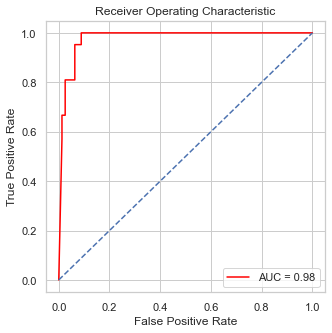

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       312
           1       1.00      0.97      0.98        88

    accuracy                           0.99       400
   macro avg       1.00      0.98      0.99       400
weighted avg       0.99      0.99      0.99       400

Train Confusion Matrix:
[[312   0]
 [  3  85]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        79
           1       0.77      0.95      0.85        21

    accuracy                           0.93       100
   macro avg       0.88      0.94      0.90       100
weighted avg       0.94      0.93      0.93       100

Test1 Confusion Matrix:
[[73  6]
 [ 1 20]]
**************************************************
Best parameters set:
{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 11}


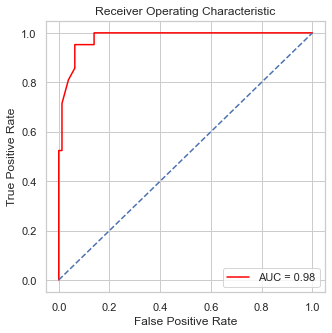

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       312
           1       0.92      0.91      0.91        88

    accuracy                           0.96       400
   macro avg       0.95      0.94      0.95       400
weighted avg       0.96      0.96      0.96       400

Train Confusion Matrix:
[[305   7]
 [  8  80]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        79
           1       0.77      0.95      0.85        21

    accuracy                           0.93       100
   macro avg       0.88      0.94      0.90       100
weighted avg       0.94      0.93      0.93       100

Test1 Confusion Matrix:
[[73  6]
 [ 1 20]]
**************************************************
Best parameters set:
{'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 19}


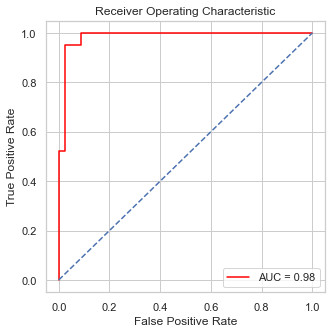

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       312
           1       0.99      0.97      0.98        88

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.99       400
weighted avg       0.99      0.99      0.99       400

Train Confusion Matrix:
[[311   1]
 [  3  85]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        79
           1       0.77      0.95      0.85        21

    accuracy                           0.93       100
   macro avg       0.88      0.94      0.90       100
weighted avg       0.94      0.93      0.93       100

Test1 Confusion Matrix:
[[73  6]
 [ 1 20]]
**************************************************
Best parameters set:
{'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 11}


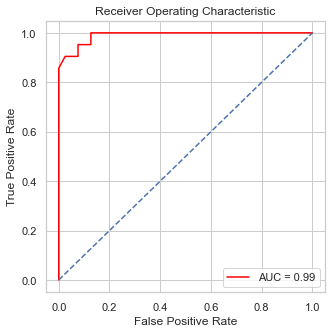

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       312
           1       0.93      0.90      0.91        88

    accuracy                           0.96       400
   macro avg       0.95      0.94      0.94       400
weighted avg       0.96      0.96      0.96       400

Train Confusion Matrix:
[[306   6]
 [  9  79]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        79
           1       0.77      0.95      0.85        21

    accuracy                           0.93       100
   macro avg       0.88      0.94      0.90       100
weighted avg       0.94      0.93      0.93       100

Test1 Confusion Matrix:
[[73  6]
 [ 1 20]]
**************************************************
Best parameters set:
{'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 14}


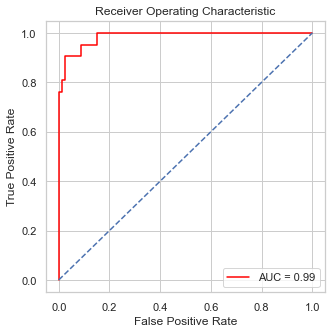

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       312
           1       0.99      0.97      0.98        88

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.99       400
weighted avg       0.99      0.99      0.99       400

Train Confusion Matrix:
[[311   1]
 [  3  85]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        79
           1       0.76      0.90      0.83        21

    accuracy                           0.92       100
   macro avg       0.87      0.91      0.89       100
weighted avg       0.93      0.92      0.92       100

Test1 Confusion Matrix:
[[73  6]
 [ 2 19]]
**************************************************
Best parameters set:
{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 14}


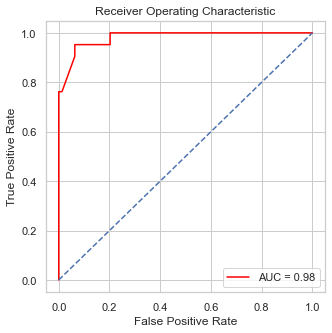

Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       312
           1       0.89      0.93      0.91        88

    accuracy                           0.96       400
   macro avg       0.94      0.95      0.94       400
weighted avg       0.96      0.96      0.96       400

Train Confusion Matrix:
[[302  10]
 [  6  82]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        79
           1       0.71      0.95      0.82        21

    accuracy                           0.91       100
   macro avg       0.85      0.93      0.88       100
weighted avg       0.93      0.91      0.91       100

Test1 Confusion Matrix:
[[71  8]
 [ 1 20]]
**************************************************
Best parameters set:
{'max_depth': 9, 'min_samples_split': 6, 'n_estimators': 19}


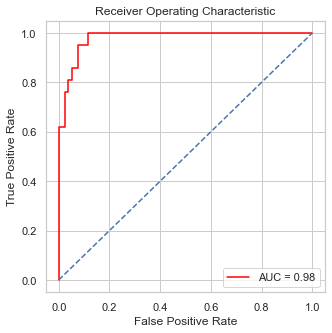

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       312
           1       0.99      0.95      0.97        88

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.99      0.99       400

Train Confusion Matrix:
[[311   1]
 [  4  84]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        79
           1       0.77      0.95      0.85        21

    accuracy                           0.93       100
   macro avg       0.88      0.94      0.90       100
weighted avg       0.94      0.93      0.93       100

Test1 Confusion Matrix:
[[73  6]
 [ 1 20]]
**************************************************
Best parameters set:
{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 18}


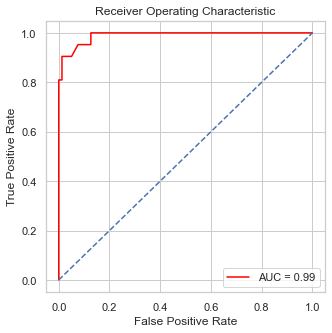

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       312
           1       0.92      0.91      0.91        88

    accuracy                           0.96       400
   macro avg       0.95      0.94      0.95       400
weighted avg       0.96      0.96      0.96       400

Train Confusion Matrix:
[[305   7]
 [  8  80]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        79
           1       0.77      0.95      0.85        21

    accuracy                           0.93       100
   macro avg       0.88      0.94      0.90       100
weighted avg       0.94      0.93      0.93       100

Test1 Confusion Matrix:
[[73  6]
 [ 1 20]]
**************************************************


In [42]:
parameters = [
    {
        'max_depth': np.arange(3, 10),
        'min_samples_split': np.arange(2, 7),
        'n_estimators': np.arange(10, 20)
    },
]

for features in features_list:
    X_train_set=X_train_cla.loc[:,features]
    X_test_set=X_test_cla.loc[:,features]
    
    rfcv = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='accuracy')
    rfcv.fit(X_train_set, y_train_cla)
    print('Best parameters set:')
    print(rfcv.best_params_)
    
    y_pred=rfcv.predict(X_test_set)
    y_proba=rfcv.predict_proba(X_test_set)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_cla,y_proba[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plot_roc_(false_positive_rate,true_positive_rate,roc_auc)
    
    predictions = [
    (rfcv.predict(X_train_set), y_train_cla, 'Train'),
    (rfcv.predict(X_test_set), y_test_cla, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print(classification_report(pred[1], pred[0]))
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)


# Naive Bayes

Best parameters set:
{}


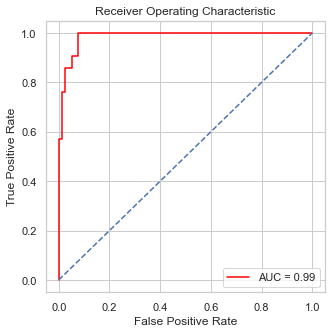

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       312
           1       0.87      0.95      0.91        88

    accuracy                           0.96       400
   macro avg       0.93      0.96      0.94       400
weighted avg       0.96      0.96      0.96       400

Train Confusion Matrix:
[[299  13]
 [  4  84]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        79
           1       0.78      1.00      0.88        21

    accuracy                           0.94       100
   macro avg       0.89      0.96      0.92       100
weighted avg       0.95      0.94      0.94       100

Test1 Confusion Matrix:
[[73  6]
 [ 0 21]]
**************************************************
Best parameters set:
{}


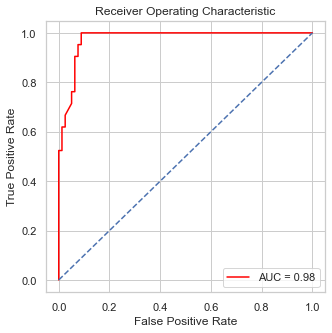

Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       312
           1       0.86      0.94      0.90        88

    accuracy                           0.95       400
   macro avg       0.92      0.95      0.94       400
weighted avg       0.96      0.95      0.96       400

Train Confusion Matrix:
[[299  13]
 [  5  83]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        79
           1       0.75      1.00      0.86        21

    accuracy                           0.93       100
   macro avg       0.88      0.96      0.91       100
weighted avg       0.95      0.93      0.93       100

Test1 Confusion Matrix:
[[72  7]
 [ 0 21]]
**************************************************
Best parameters set:
{}


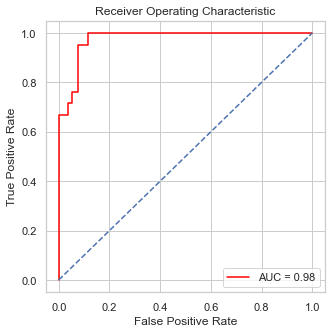

Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       312
           1       0.85      0.93      0.89        88

    accuracy                           0.95       400
   macro avg       0.91      0.94      0.93       400
weighted avg       0.95      0.95      0.95       400

Train Confusion Matrix:
[[297  15]
 [  6  82]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        79
           1       0.74      0.95      0.83        21

    accuracy                           0.92       100
   macro avg       0.86      0.93      0.89       100
weighted avg       0.93      0.92      0.92       100

Test1 Confusion Matrix:
[[72  7]
 [ 1 20]]
**************************************************
Best parameters set:
{}


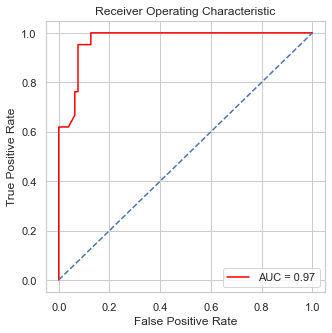

Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       312
           1       0.83      0.92      0.87        88

    accuracy                           0.94       400
   macro avg       0.90      0.93      0.92       400
weighted avg       0.94      0.94      0.94       400

Train Confusion Matrix:
[[295  17]
 [  7  81]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        79
           1       0.74      0.95      0.83        21

    accuracy                           0.92       100
   macro avg       0.86      0.93      0.89       100
weighted avg       0.93      0.92      0.92       100

Test1 Confusion Matrix:
[[72  7]
 [ 1 20]]
**************************************************
Best parameters set:
{}


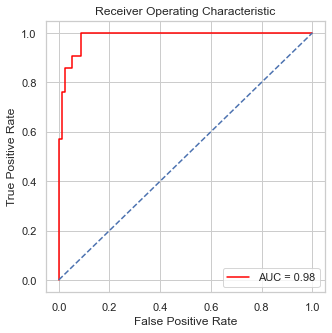

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       312
           1       0.86      0.97      0.91        88

    accuracy                           0.96       400
   macro avg       0.92      0.96      0.94       400
weighted avg       0.96      0.96      0.96       400

Train Confusion Matrix:
[[298  14]
 [  3  85]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        79
           1       0.75      1.00      0.86        21

    accuracy                           0.93       100
   macro avg       0.88      0.96      0.91       100
weighted avg       0.95      0.93      0.93       100

Test1 Confusion Matrix:
[[72  7]
 [ 0 21]]
**************************************************
Best parameters set:
{}


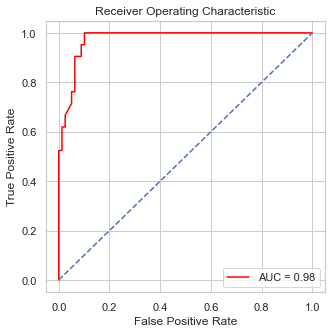

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       312
           1       0.85      0.97      0.90        88

    accuracy                           0.95       400
   macro avg       0.92      0.96      0.94       400
weighted avg       0.96      0.95      0.96       400

Train Confusion Matrix:
[[297  15]
 [  3  85]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        79
           1       0.74      0.95      0.83        21

    accuracy                           0.92       100
   macro avg       0.86      0.93      0.89       100
weighted avg       0.93      0.92      0.92       100

Test1 Confusion Matrix:
[[72  7]
 [ 1 20]]
**************************************************
Best parameters set:
{}


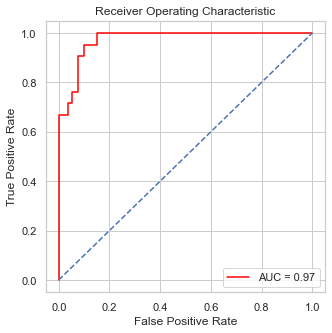

Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       312
           1       0.82      0.94      0.88        88

    accuracy                           0.94       400
   macro avg       0.90      0.94      0.92       400
weighted avg       0.95      0.94      0.94       400

Train Confusion Matrix:
[[294  18]
 [  5  83]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        79
           1       0.70      0.90      0.79        21

    accuracy                           0.90       100
   macro avg       0.84      0.90      0.86       100
weighted avg       0.92      0.90      0.90       100

Test1 Confusion Matrix:
[[71  8]
 [ 2 19]]
**************************************************
Best parameters set:
{}


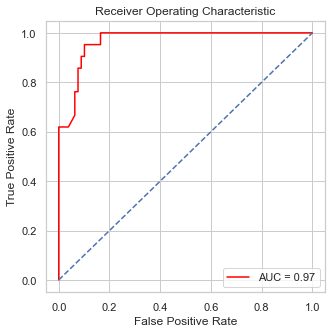

Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       312
           1       0.81      0.94      0.87        88

    accuracy                           0.94       400
   macro avg       0.89      0.94      0.91       400
weighted avg       0.94      0.94      0.94       400

Train Confusion Matrix:
[[292  20]
 [  5  83]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        79
           1       0.70      0.90      0.79        21

    accuracy                           0.90       100
   macro avg       0.84      0.90      0.86       100
weighted avg       0.92      0.90      0.90       100

Test1 Confusion Matrix:
[[71  8]
 [ 2 19]]
**************************************************


In [38]:
parameters = [
    {
    },
]

for features in features_list:
    X_train_set=X_train_cla.loc[:,features]
    X_test_set=X_test_cla.loc[:,features]
    
    NBcv = GridSearchCV(GaussianNB(), parameters, cv=5,scoring='accuracy')
    NBcv.fit(X_train_set, y_train_cla)
    print('Best parameters set:')
    print(NBcv.best_params_)
    
    y_pred=NBcv.predict(X_test_set)
    y_proba=NBcv.predict_proba(X_test_set)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_cla,y_proba[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plot_roc_(false_positive_rate,true_positive_rate,roc_auc)
    
    predictions = [
    (NBcv.predict(X_train_set), y_train_cla, 'Train'),
    (NBcv.predict(X_test_set), y_test_cla, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print(classification_report(pred[1], pred[0]))
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)


# SVM Classification

Best parameters set:
{'C': 1, 'gamma': 0.3}


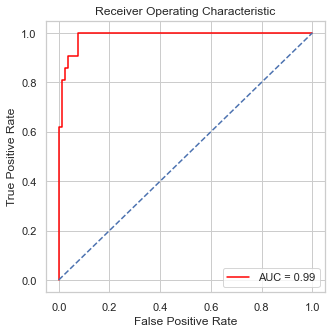

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       312
           1       0.98      0.91      0.94        88

    accuracy                           0.97       400
   macro avg       0.98      0.95      0.96       400
weighted avg       0.98      0.97      0.97       400

Train Confusion Matrix:
[[310   2]
 [  8  80]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        79
           1       0.79      0.90      0.84        21

    accuracy                           0.93       100
   macro avg       0.88      0.92      0.90       100
weighted avg       0.94      0.93      0.93       100

Test1 Confusion Matrix:
[[74  5]
 [ 2 19]]
**************************************************
Best parameters set:
{'C': 1, 'gamma': 0.03}


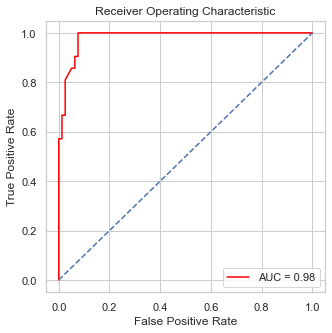

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       312
           1       0.94      0.89      0.91        88

    accuracy                           0.96       400
   macro avg       0.95      0.94      0.94       400
weighted avg       0.96      0.96      0.96       400

Train Confusion Matrix:
[[307   5]
 [ 10  78]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        79
           1       0.79      0.90      0.84        21

    accuracy                           0.93       100
   macro avg       0.88      0.92      0.90       100
weighted avg       0.94      0.93      0.93       100

Test1 Confusion Matrix:
[[74  5]
 [ 2 19]]
**************************************************
Best parameters set:
{'C': 10, 'gamma': 0.1}


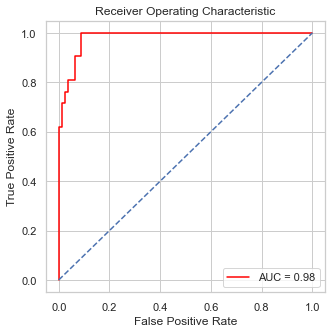

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       312
           1       0.94      0.89      0.91        88

    accuracy                           0.96       400
   macro avg       0.95      0.94      0.94       400
weighted avg       0.96      0.96      0.96       400

Train Confusion Matrix:
[[307   5]
 [ 10  78]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        79
           1       0.76      0.90      0.83        21

    accuracy                           0.92       100
   macro avg       0.87      0.91      0.89       100
weighted avg       0.93      0.92      0.92       100

Test1 Confusion Matrix:
[[73  6]
 [ 2 19]]
**************************************************
Best parameters set:
{'C': 10, 'gamma': 0.1}


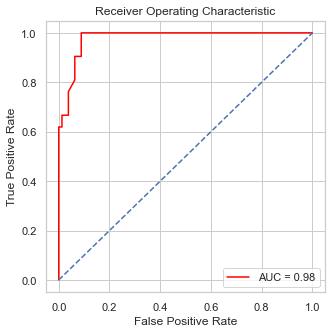

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       312
           1       0.93      0.90      0.91        88

    accuracy                           0.96       400
   macro avg       0.95      0.94      0.94       400
weighted avg       0.96      0.96      0.96       400

Train Confusion Matrix:
[[306   6]
 [  9  79]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        79
           1       0.76      0.90      0.83        21

    accuracy                           0.92       100
   macro avg       0.87      0.91      0.89       100
weighted avg       0.93      0.92      0.92       100

Test1 Confusion Matrix:
[[73  6]
 [ 2 19]]
**************************************************
Best parameters set:
{'C': 100, 'gamma': 1}


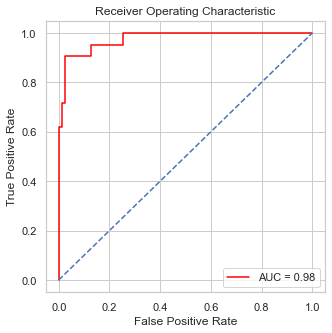

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       312
           1       0.97      0.95      0.96        88

    accuracy                           0.98       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.98      0.98       400

Train Confusion Matrix:
[[309   3]
 [  4  84]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        79
           1       0.79      0.90      0.84        21

    accuracy                           0.93       100
   macro avg       0.88      0.92      0.90       100
weighted avg       0.94      0.93      0.93       100

Test1 Confusion Matrix:
[[74  5]
 [ 2 19]]
**************************************************
Best parameters set:
{'C': 1, 'gamma': 0.3}


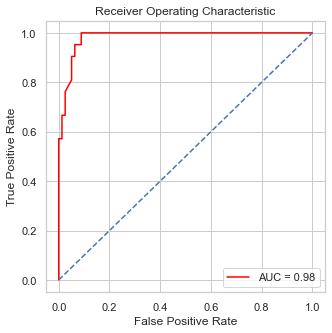

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       312
           1       0.91      0.91      0.91        88

    accuracy                           0.96       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.96      0.96      0.96       400

Train Confusion Matrix:
[[304   8]
 [  8  80]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        79
           1       0.79      0.90      0.84        21

    accuracy                           0.93       100
   macro avg       0.88      0.92      0.90       100
weighted avg       0.94      0.93      0.93       100

Test1 Confusion Matrix:
[[74  5]
 [ 2 19]]
**************************************************
Best parameters set:
{'C': 100, 'gamma': 0.1}


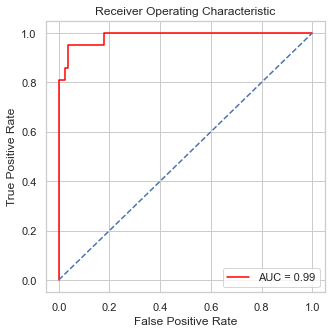

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       312
           1       0.93      0.91      0.92        88

    accuracy                           0.96       400
   macro avg       0.95      0.94      0.95       400
weighted avg       0.96      0.96      0.96       400

Train Confusion Matrix:
[[306   6]
 [  8  80]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        79
           1       0.77      0.95      0.85        21

    accuracy                           0.93       100
   macro avg       0.88      0.94      0.90       100
weighted avg       0.94      0.93      0.93       100

Test1 Confusion Matrix:
[[73  6]
 [ 1 20]]
**************************************************
Best parameters set:
{'C': 1, 'gamma': 10}


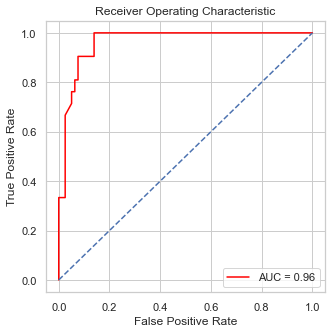

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       312
           1       0.91      0.91      0.91        88

    accuracy                           0.96       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.96      0.96      0.96       400

Train Confusion Matrix:
[[304   8]
 [  8  80]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        79
           1       0.76      0.90      0.83        21

    accuracy                           0.92       100
   macro avg       0.87      0.91      0.89       100
weighted avg       0.93      0.92      0.92       100

Test1 Confusion Matrix:
[[73  6]
 [ 2 19]]
**************************************************


In [39]:
parameters = [
    {
        'gamma':[0.01,0.03,0.1,0.3,1,3,10],
        'C':[0.01,0.03,0.1,0.3,1,3,10,100]
    },
]

for features in features_list:
    X_train_set=X_train_cla.loc[:,features]
    X_test_set=X_test_cla.loc[:,features]
    
    svmcv = GridSearchCV(SVC(probability=True), parameters, cv=5,scoring='accuracy')
    svmcv.fit(X_train_set, y_train_cla)
    print('Best parameters set:')
    print(svmcv.best_params_)
    
    y_pred=svmcv.predict(X_test_set)
    y_proba=svmcv.predict_proba(X_test_set)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_cla,y_proba[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plot_roc_(false_positive_rate,true_positive_rate,roc_auc)
    
    predictions = [
    (svmcv.predict(X_train_set), y_train_cla, 'Train'),
    (svmcv.predict(X_test_set), y_test_cla, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print(classification_report(pred[1], pred[0]))
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)


# Graident Boosting Classification

Best parameters set:
{'learning_rate': 0.5, 'n_estimators': 13}


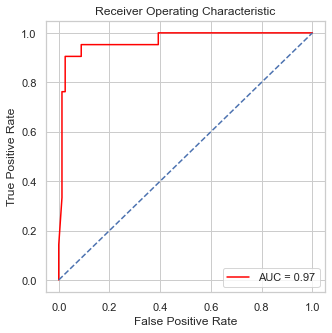

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00        88

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Train Confusion Matrix:
[[312   0]
 [  0  88]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        79
           1       0.76      0.90      0.83        21

    accuracy                           0.92       100
   macro avg       0.87      0.91      0.89       100
weighted avg       0.93      0.92      0.92       100

Test1 Confusion Matrix:
[[73  6]
 [ 2 19]]
**************************************************
Best parameters set:
{'learning_rate': 0.5, 'n_estimators': 17}


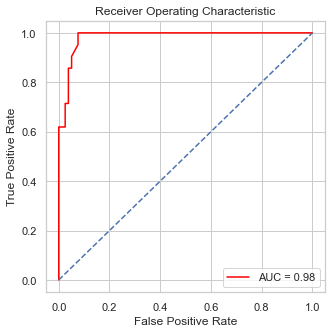

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       312
           1       0.96      0.98      0.97        88

    accuracy                           0.98       400
   macro avg       0.97      0.98      0.98       400
weighted avg       0.99      0.98      0.99       400

Train Confusion Matrix:
[[308   4]
 [  2  86]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        79
           1       0.83      0.90      0.86        21

    accuracy                           0.94       100
   macro avg       0.90      0.93      0.91       100
weighted avg       0.94      0.94      0.94       100

Test1 Confusion Matrix:
[[75  4]
 [ 2 19]]
**************************************************
Best parameters set:
{'learning_rate': 0.3, 'n_estimators': 13}


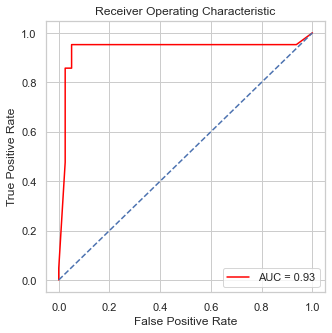

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       312
           1       1.00      0.98      0.99        88

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400

Train Confusion Matrix:
[[312   0]
 [  2  86]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        79
           1       0.77      0.95      0.85        21

    accuracy                           0.93       100
   macro avg       0.88      0.94      0.90       100
weighted avg       0.94      0.93      0.93       100

Test1 Confusion Matrix:
[[73  6]
 [ 1 20]]
**************************************************
Best parameters set:
{'learning_rate': 0.3, 'n_estimators': 14}


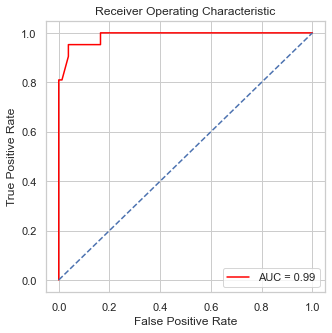

Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       312
           1       0.98      0.92      0.95        88

    accuracy                           0.98       400
   macro avg       0.98      0.96      0.97       400
weighted avg       0.98      0.98      0.98       400

Train Confusion Matrix:
[[310   2]
 [  7  81]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        79
           1       0.87      0.95      0.91        21

    accuracy                           0.96       100
   macro avg       0.93      0.96      0.94       100
weighted avg       0.96      0.96      0.96       100

Test1 Confusion Matrix:
[[76  3]
 [ 1 20]]
**************************************************
Best parameters set:
{'learning_rate': 0.5, 'n_estimators': 15}


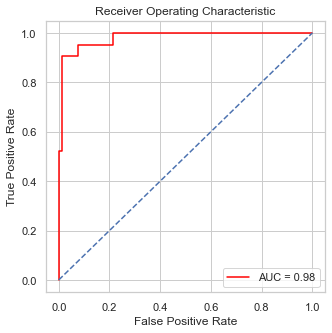

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00        88

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Train Confusion Matrix:
[[312   0]
 [  0  88]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        79
           1       0.83      0.90      0.86        21

    accuracy                           0.94       100
   macro avg       0.90      0.93      0.91       100
weighted avg       0.94      0.94      0.94       100

Test1 Confusion Matrix:
[[75  4]
 [ 2 19]]
**************************************************
Best parameters set:
{'learning_rate': 0.3, 'n_estimators': 11}


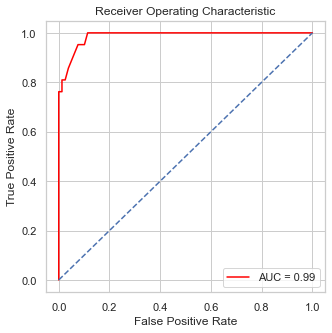

Train Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       312
           1       0.99      0.91      0.95        88

    accuracy                           0.98       400
   macro avg       0.98      0.95      0.97       400
weighted avg       0.98      0.98      0.98       400

Train Confusion Matrix:
[[311   1]
 [  8  80]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        79
           1       0.86      0.86      0.86        21

    accuracy                           0.94       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.94      0.94      0.94       100

Test1 Confusion Matrix:
[[76  3]
 [ 3 18]]
**************************************************
Best parameters set:
{'learning_rate': 0.3, 'n_estimators': 12}


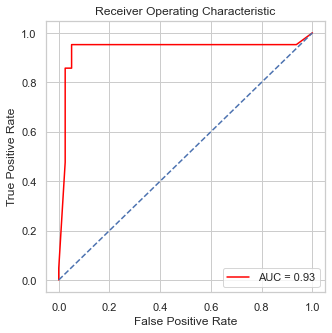

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       312
           1       1.00      0.98      0.99        88

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400

Train Confusion Matrix:
[[312   0]
 [  2  86]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        79
           1       0.74      0.95      0.83        21

    accuracy                           0.92       100
   macro avg       0.86      0.93      0.89       100
weighted avg       0.93      0.92      0.92       100

Test1 Confusion Matrix:
[[72  7]
 [ 1 20]]
**************************************************
Best parameters set:
{'learning_rate': 0.3, 'n_estimators': 5}


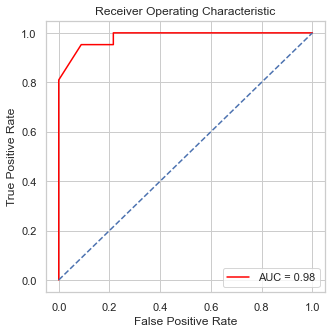

Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       312
           1       0.90      0.95      0.93        88

    accuracy                           0.97       400
   macro avg       0.95      0.96      0.95       400
weighted avg       0.97      0.97      0.97       400

Train Confusion Matrix:
[[303   9]
 [  4  84]]
**************************************************
Test1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        79
           1       0.74      0.95      0.83        21

    accuracy                           0.92       100
   macro avg       0.86      0.93      0.89       100
weighted avg       0.93      0.92      0.92       100

Test1 Confusion Matrix:
[[72  7]
 [ 1 20]]
**************************************************


In [40]:
parameters = [
{
    'learning_rate': [0.01,0.03,0.1,0.3,0.5,1],
    'n_estimators': np.arange(3, 20)
    },
]

for features in features_list:
    X_train_set=X_train_cla.loc[:,features]
    X_test_set=X_test_cla.loc[:,features]
    
    gbccv = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5,scoring='accuracy')
    gbccv.fit(X_train_set, y_train_cla)
    print('Best parameters set:')
    print(gbccv.best_params_)
    
    y_pred=gbccv.predict(X_test_set)
    y_proba=gbccv.predict_proba(X_test_set)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_cla,y_proba[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plot_roc_(false_positive_rate,true_positive_rate,roc_auc)
    
    predictions = [
    (gbccv.predict(X_train_set), y_train_cla, 'Train'),
    (gbccv.predict(X_test_set), y_test_cla, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print(classification_report(pred[1], pred[0]))
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

# Feature Importance

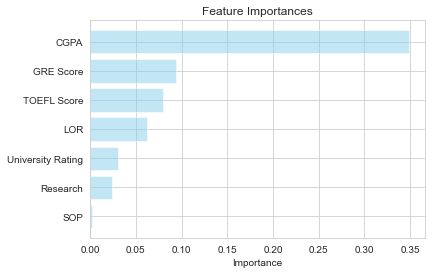

In [33]:
plt.barh([7,6,5,4,3,2,1],[0.34884989, 0.09342409, 0.07992154, 0.06217695, 0.03055844,0.02339441, 0.00158973], align='center', alpha=0.5,color='skyblue')
plt.yticks([7,6,5,4,3,2,1], ['CGPA', 'GRE Score', 'TOEFL Score','LOR', 'University Rating', 'Research','SOP'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()